**Important Libraries**

In [ ]:
import pandas as pd
import numpy as np
from keras.layers import Dense,Flatten,Dropout,MaxPooling2D,Conv2D
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix 
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import zipfile

**Mounting the GOOGLE DRIVE**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#!unzip "/content/drive/MyDrive/Dataset/Dataset_for_research_paper.zip" -d "/content/drive/MyDrive/Dataset/Cell_images/"

**Importing the DATASET from google drive**

In [ ]:
#Import images from the datset
Train_datagen = ImageDataGenerator(rescale=1./255,horizontal_flip=True,
                                   zoom_range=0.2,shear_range=0.2)
Test_datagen = ImageDataGenerator(rescale=1./255)

train_set = Train_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/Cell_images/cell_images/Train',
                                              target_size=(50,50),color_mode='rgb',
                                              class_mode='binary',
                                              batch_size=64)

validate_set = Test_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/Cell_images/cell_images/Validate',
                                              target_size=(50,50),color_mode='rgb',
                                              class_mode='binary',
                                              batch_size=64)

Found 13778 images belonging to 2 classes.
Found 13780 images belonging to 2 classes.


In [ ]:
batchX, batchy = train_set.next()
print('Batch shape=%s, min=%.3f, max=%.3f' % (batchX.shape, batchX.min(), batchX.max()))

Batch shape=(64, 50, 50, 3), min=0.000, max=0.906


**Creating CNN MODEL**

In [ ]:
#Define the model
model=Sequential()
model.add(Conv2D(256,kernel_size=2,input_shape=(50,50,3),activation='relu'))
#model.add(MaxPooling2D(2,2))
#model.add(Conv2D(64,kernel_size=2,activation='relu'))\n",
#model.add(MaxPooling2D(2,2))\n",
#model.add(Conv2D(32,kernel_size=2,activation='relu'))\n",
#model.add(MaxPooling2D(2, 2))\n",
#model.add(Conv2D(16,kernel_size=2,activation='relu'))\n",
#model.add(MaxPooling2D(2, 2))\n",
#model.add(Dropout(0.2))\n",
#model.add(Flatten())\n",
#model.add(Dense(500,activation=\"relu\"))\n",
#model.add(Dropout(0.2))\n",
#model.add(Dense(2,activation=\"relu\"))\n",
model.add(Conv2D(128,activation='relu',kernel_size=2))
model.add(Conv2D(64,activation='relu',kernel_size=2))
model.add(Conv2D(32,activation='relu',kernel_size=2))
model.add(Conv2D(16,activation='relu',kernel_size=2))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(25,activation='relu'))
model.add(Dense(12,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 49, 49, 256)       3328      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 128)       131200    
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 47, 47, 64)        32832     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 46, 46, 32)        8224      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 45, 45, 16)        2064      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 22, 22, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 7744)              0

**Compiling the model**

In [ ]:
#Complie thr model
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=['accuracy'])

In [ ]:
#Run the model to train it.
history=model.fit_generator(train_set,
                    validation_data=validate_set,
                    steps_per_epoch = train_set.n//train_set.batch_size,
                    validation_steps = validate_set.n//validate_set.batch_size,
                    #steps_per_epoch=50, validation_steps=50,
                    epochs=3,verbose=1)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/3
215/215 [==============================] - 1091s 5s/step - loss: 0.1665 - accuracy: 0.9511 - val_loss: 0.2129 - val_accuracy: 0.9200
Epoch 2/3
215/215 [==============================] - 1099s 5s/step - loss: 0.1576 - accuracy: 0.9527 - val_loss: 0.2187 - val_accuracy: 0.9094
Epoch 3/3
215/215 [==============================] - 1093s 5s/step - loss: 0.1479 - accuracy: 0.9546 - val_loss: 0.2172 - val_accuracy: 0.9187


**Running the model on Validation Set**

In [ ]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(validate_set,batch_size=64)
print("test loss, test acc:", results)

Evaluate on test data
216/216 [==============================] - 226s 1s/step - loss: 0.2176 - accuracy: 0.9185
test loss, test acc: [0.21758975088596344, 0.918505072593689]


**Graph of loss and accuracy**

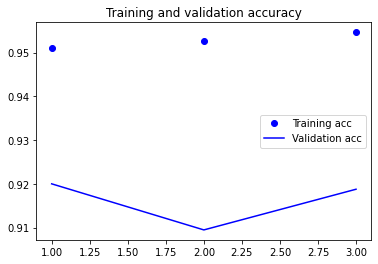

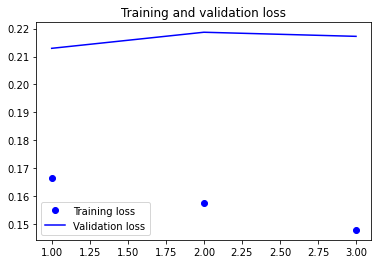

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

**Now predicting the model using new dataset**

In [ ]:
#Predicting data generator
Predict_datagen = ImageDataGenerator(rescale=1./255)
predict_set = Predict_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/Cell_images/cell_images/Test',
                                              target_size=(50,50),color_mode='rgb',
                                              class_mode='binary',
                                              batch_size=1)

Found 20 images belonging to 2 classes.


In [ ]:
predict_data = model.predict(predict_set)
predict_data

array([[9.7659332e-01],
       [8.3403802e-01],
       [1.2222230e-03],
       [9.3182874e-01],
       [9.7895968e-01],
       [3.8575888e-02],
       [9.8065621e-01],
       [9.6507668e-01],
       [2.3463070e-03],
       [9.6514434e-01],
       [1.5379697e-02],
       [1.2650937e-02],
       [2.7065595e-05],
       [3.2343650e-01],
       [9.7810483e-01],
       [9.7183400e-01],
       [7.7524781e-04],
       [9.7635758e-01],
       [5.1009655e-04],
       [1.4601294e-05]], dtype=float32)

**Displaying the results**

(1, 50, 50, 3)


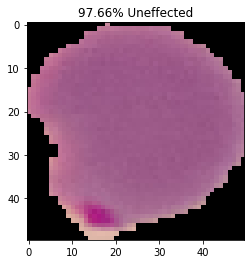

(1, 50, 50, 3)


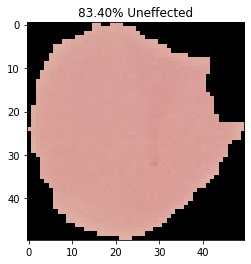

(1, 50, 50, 3)


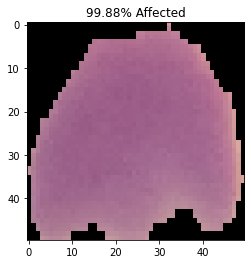

(1, 50, 50, 3)


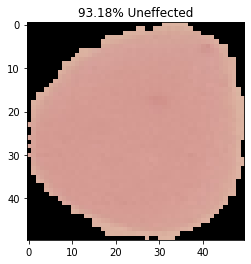

(1, 50, 50, 3)


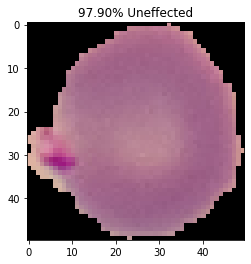

(1, 50, 50, 3)


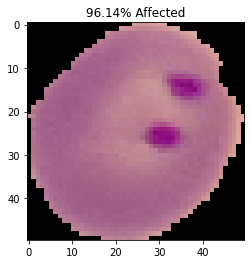

(1, 50, 50, 3)


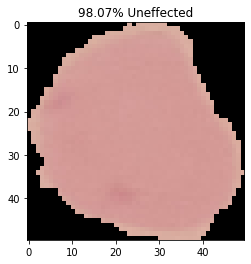

(1, 50, 50, 3)


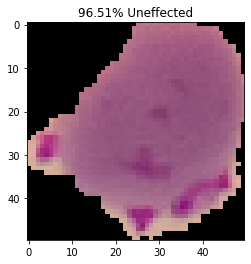

(1, 50, 50, 3)


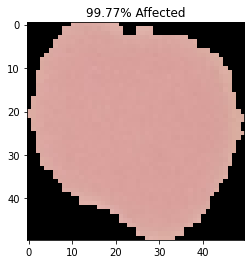

(1, 50, 50, 3)


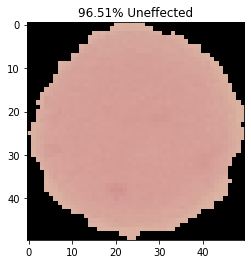

(1, 50, 50, 3)


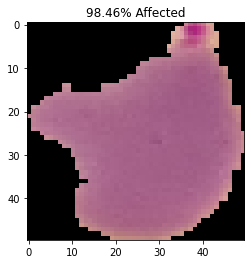

(1, 50, 50, 3)


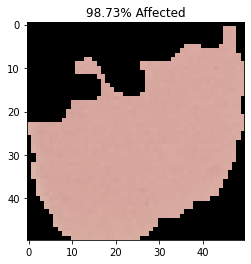

(1, 50, 50, 3)


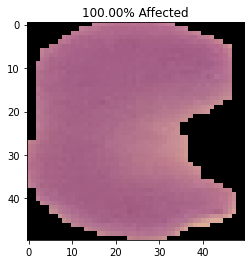

(1, 50, 50, 3)


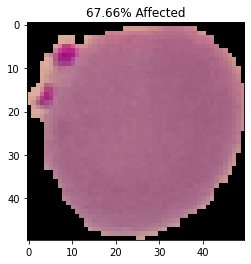

(1, 50, 50, 3)


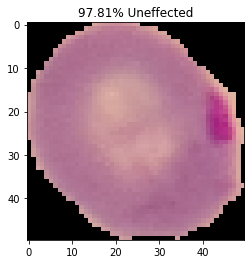

(1, 50, 50, 3)


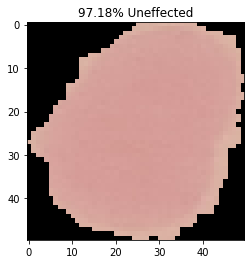

(1, 50, 50, 3)


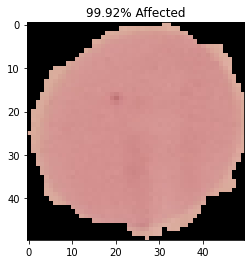

(1, 50, 50, 3)


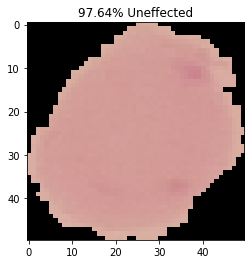

(1, 50, 50, 3)


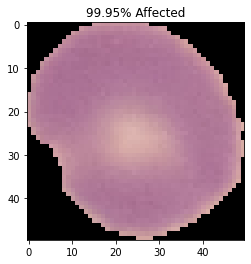

(1, 50, 50, 3)


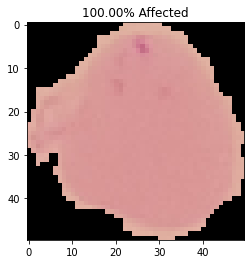

In [ ]:
#Now displaying the results alongwith the images
for i in range(20):
    img, label = predict_set.next()
    print(img.shape)   #(1,50,50,3)
    plt.imshow(img[0])
    #print(predict_set.filenames[i])
    if predict_data[i] > 0.5:
        plt.title("%.2f" % (predict_data[i]*100) + "% Uneffected")
    else:
        plt.title("%.2f" % ((1-predict_data[i])*100) + "% Affected")
    plt.show()